Josh Hoge

jsh10043@nyu.edu

NYU Tandon Data Science Bootcamp Week 6 Homework

### Problem 1: Dataset Splitting

1. You have recordings of 44 phones from 100 people; each person records ~200 phones/day for 5 days.
   - Design a valid training/validation/test split strategy that ensures the model generalizes to **new speakers**.

2. You now receive an additional dataset of 10,000 phone recordings from **Kilian**, a single speaker.
   - You must train a model that performs well **specifically for Kilian**, while also maintaining generalization.

*Describe your proposed split strategy and reasoning.* (Theory)

Because we want a model that trains well on Kilian, a single speaker, and we have 2 orders of magnitude more samples from him, we should consider approaching the split as follows:

Pre-train on a base training set of 80 speakers for a speaker-invariant classifier. 10 speakers should serve as a validation set, and the remaining 10 speakers should be a test set. Sampling in these sets should be normally distributed.

Killian has 10,000 recordings that will be used for fine-tuning (so that it performs well for Kilian), so we shuffle and split into:
7,000 training, 1,500 validation, and 1,500 test sets.

There should be no leakage from the Kilian set into the base set.

### Problem 2: K-Nearest Neighbors

1. **1-NN Classification:** Given dataset:

   Positive: (1,2), (1,4), (5,4)

   Negative: (3,1), (3,2)

   Plot the 1-NN decision boundary and classify new points visually.

2. **Feature Scaling:** Consider dataset:

   Positive: (100,2), (100,4), (500,4)

   Negative: (300,1), (300,2)

   What would the 1-NN classify point (500,1) as **before and after scaling** to [0,1] per feature?

3. **Handling Missing Values:** How can you modify K-NN to handle missing features in a test point?

4. **High-dimensional Data:** Why can K-NN still work well for images even with thousands of pixels?


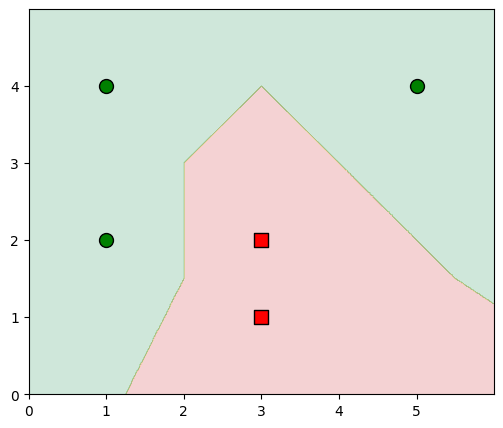

In [ ]:
# 2.1
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

pos = np.array([[1, 2], [1, 4], [5, 4]])
neg = np.array([[3, 1], [3, 2]])

X = np.vstack((pos, neg))
y = np.hstack((np.ones(len(pos)), np.zeros(len(neg))))

# 1-NN model
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

# decision boundary grid
h = 0.01  # resolution
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = knn.predict(grid_points).reshape(xx.shape)

plt.figure(figsize=(6, 5))

# the decision surface
plt.contourf(xx, yy, Z, alpha=0.2, cmap=plt.cm.RdYlGn)

# plot training points
plt.scatter(pos[:, 0], pos[:, 1], c='g', edgecolor='k',
            marker='o', s=100, label='Positive')
plt.scatter(neg[:, 0], neg[:, 1], c='r', edgecolor='k',
            marker='s', s=100, label='Negative')


In [ ]:
# 2.2
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

X_raw = np.array([
    [100, 2],   # Positive
    [100, 4],   # Positive
    [500, 4],   # Positive
    [300, 1],   # Negative
    [300, 2]    # Negative
])
y_raw = np.array([1, 1, 1, 0, 0])

# 1-NN on raw data
knn_raw = KNeighborsClassifier(n_neighbors=1)
knn_raw.fit(X_raw, y_raw)

point = np.array([[500, 1]])
pred_raw = knn_raw.predict(point)[0]

print("Raw‑data prediction for (500,1):", "Positive" if pred_raw == 1 else "Negative")

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_raw)
point_scaled = scaler.transform(point)

# 1-NN on scaled data
knn_scaled = KNeighborsClassifier(n_neighbors=1)
knn_scaled.fit(X_scaled, y_raw)

pred_scaled = knn_scaled.predict(point_scaled)[0]

print("Scaled‑data prediction for (500,1):", "Positive" if pred_scaled == 1 else "Negative")


Raw‑data prediction for (500,1): Positive
Scaled‑data prediction for (500,1): Negative


###2.3
There are several ways to deal with missing values, but one of the most common is to fill (imupte) the missing entries of the test point using a K-NN imputer, and then run standard K-NN. The K-NN imputer finds the most similar training samples and replaces each missing intry with the mean or median of those neighbor's values.

###2.4
K-NN works well on images and other high-dimensional data when informative, low-dimension features are extracted _first_. The combination of compact representations makes K-NN (a non-parametric technique) a strong baseline for vision and other high-dimension tasks.

### Problem 3: Part 1

You are given a fully trained Perceptron model with weight vector **w**, along with training set **D_TR** and test set **D_TE**.

1. Your co-worker suggests evaluating $h(x) = sign(w \cdot x)$ for every $(x, y)$ in D_TR and D_TE. Does this help determine whether test error is higher than training error?
2. Why is there no need to compute training error explicitly for the Perceptron algorithm?

###3.1
Yes, evaluating ℎ(𝑥)=𝑠𝑖𝑔𝑛(𝑤⋅𝑥)  for every (𝑥,𝑦) in D_TR and D_TE tells us if the test error is larger than the training error. Computing ℎ(𝑥) produces the predicted label, which can be compared to the true label. D_TR provides the training error, and D_TE provides the test error, so no additional statistics are required.

###3.2
I think that the Perceptron's learning rule already monitors and eliminates training errors, so the training error is either zero or already captured by the update count. This is why no error computation is needed.

### Problem 3: Two-point 2D Dataset (Part 2)

Run the Perceptron algorithm **by hand or in code** on the following data:

1. Positive class: (10, -2)
2. Negative class: (12, 2)

Start with $w_0 = (0, 0)$ and a learning rate of 1.

- Compute how many updates are required until convergence.
- Write down the sequence of $w_i$ vectors.

In [5]:
# 3.2
import numpy as np

X = np.array([[10, -2], [12,  2]])
y = np.array([+1, -1])

# parameters
w = np.array([0.0, 0.0])
eta = 1.0

# list of all weight vectors to print
weights_history = [w.copy()]

updates = 0
while True:
    misclassified = False

    # scan the dataset in sequence
    for xi, yi in zip(X, y):
        if yi * np.dot(w, xi) <= 0:
            w += eta * yi * xi
            updates += 1
            weights_history.append(w.copy())
            misclassified = True
            break
    if not misclassified:
        break


print("Number of updates until convergence :", updates)
print("\nSequence of weight vectors (wᵢ):")
for i, vec in enumerate(weights_history):
    print(f"w{i} = ({vec[0]:.0f}, {vec[1]:.0f})")


Number of updates until convergence : 9

Sequence of weight vectors (wᵢ):
w0 = (0, 0)
w1 = (10, -2)
w2 = (-2, -4)
w3 = (8, -6)
w4 = (-4, -8)
w5 = (6, -10)
w6 = (-6, -12)
w7 = (4, -14)
w8 = (-8, -16)
w9 = (2, -18)


### Problem 4: Reconstructing the Weight Vector

Given the log of Perceptron updates:

| x | y | count |
|---|---|--------|
| (0, 0, 0, 0, 4) | +1 | 2 |
| (0, 0, 6, 5, 0) | +1 | 1 |
| (3, 0, 0, 0, 0) | -1 | 1 |
| (0, 9, 3, 6, 0) | -1 | 1 |
| (0, 1, 0, 2, 5) | -1 | 1 |

Assume learning rate = 1 and initial weight $w_0 = (0, 0, 0, 0, 0)$.

Compute the final weight vector after all updates.

In [6]:
# 4
import numpy as np

# initial weight
w = np.zeros(5)

# list of tuples
updates = [
    (np.array([0, 0, 0, 0, 4]),  1, 2),
    (np.array([0, 0, 6, 5, 0]),  1, 1),
    (np.array([3, 0, 0, 0, 0]), -1, 1),
    (np.array([0, 9, 3, 6, 0]), -1, 1),
    (np.array([0, 1, 0, 2, 5]), -1, 1)
]

for x, y, cnt in updates:
    w += y * cnt * x

print("Final weight vector:", w)


Final weight vector: [ -3. -10.   3.  -3.   3.]


### Problem 5: Visualizing Perceptron Convergence

Implement a Perceptron on a small 2D dataset with positive and negative examples.

- Plot the data points.
- After each update, visualize the decision boundary.
- Show how it converges to a stable separator.

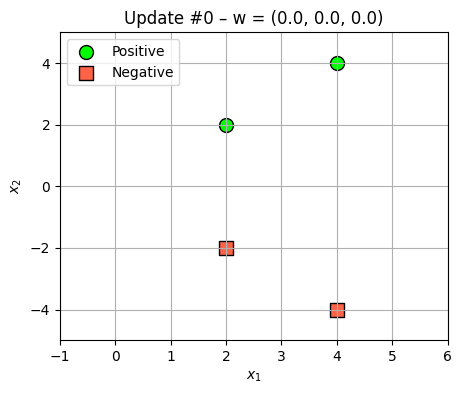

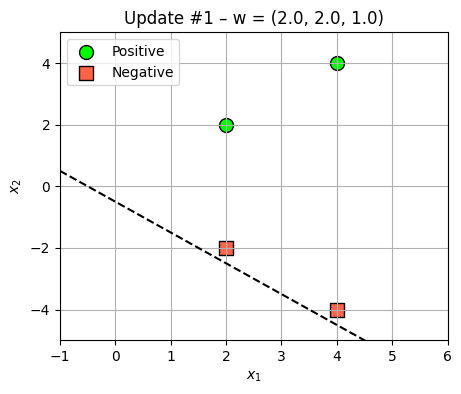

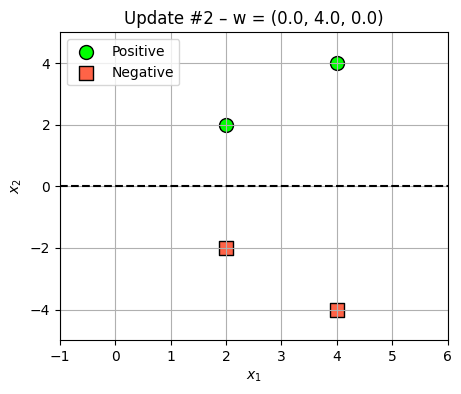

Perceptron converged after 2 updates.
Final weight vector: [0. 4. 0.]


In [12]:
# 5
import numpy as np
import matplotlib.pyplot as plt
import os

X = np.array([[2, 2], [4, 4], [2, -2], [4, -4]])  # +1  # +1  # -1  # -1
y = np.array([+1, +1, -1, -1])


# perceptron training
def perceptron_weights(X, y, eta=1.0, max_iters=100):
    Xb = np.hstack([X, np.ones((X.shape[0], 1))])
    w = np.zeros(3)
    history = [w.copy()]

    it = 0
    while it < max_iters:
        error = False
        for xi, yi in zip(Xb, y):
            if yi * np.dot(w, xi) <= 0:
                w += eta * yi * xi
                history.append(w.copy())
                error = True
                break
        if not error:
            break
        it += 1
    return history


weights = perceptron_weights(X, y)


# plot
def plot_boundary(ax, w, xlim=(-1, 6)):
    # skip drawing if weight vector is zero
    if np.linalg.norm(w) < 1e-9:
        return

    if np.abs(w[1]) < 1e-9:
        x_vert = -w[2] / w[0]
        ax.axvline(x_vert, color='k', linestyle='--')
    else:
        xs = np.array(xlim)
        ys = -(w[0] * xs + w[2]) / w[1]
        ax.plot(xs, ys, 'k--')

def draw_step(step_idx, w):
    fig, ax = plt.subplots(figsize=(5, 4))
    pos = y == 1
    neg = y == -1
    ax.scatter(X[pos, 0], X[pos, 1],
               c='lime', edgecolor='k', marker='o', s=100,
               label='Positive')
    ax.scatter(X[neg, 0], X[neg, 1],
               c='tomato', edgecolor='k', marker='s', s=100,
               label='Negative')
    plot_boundary(ax, w)
    ax.set_xlim(-1, 6)
    ax.set_ylim(-5, 5)
    ax.set_xlabel(r'$x_1$')
    ax.set_ylabel(r'$x_2$')
    ax.set_title(f'Update #{step_idx} – w = ({w[0]:.1f}, {w[1]:.1f}, {w[2]:.1f})')
    ax.legend(loc='upper left')
    ax.grid(True)
    plt.show()


# generate a chart for each weight
for i, w_vec in enumerate(weights):
    draw_step(i, w_vec)

print(f"Perceptron converged after {len(weights)-1} updates.")
print("Final weight vector:", weights[-1])


